In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import hilbert

In [2]:
data1 = pd.read_csv('../data/data1.csv')
data2 = pd.read_csv('../data/data2.csv')
data3 = pd.read_csv('../data/data3.csv')

time1, time2, time3 = np.array(data1['time']), np.array(data2['time']), np.array(data3['time'])
strain1, strain2, strain3 = np.array(data1['strain']), np.array(data2['strain']), np.array(data3['strain'])

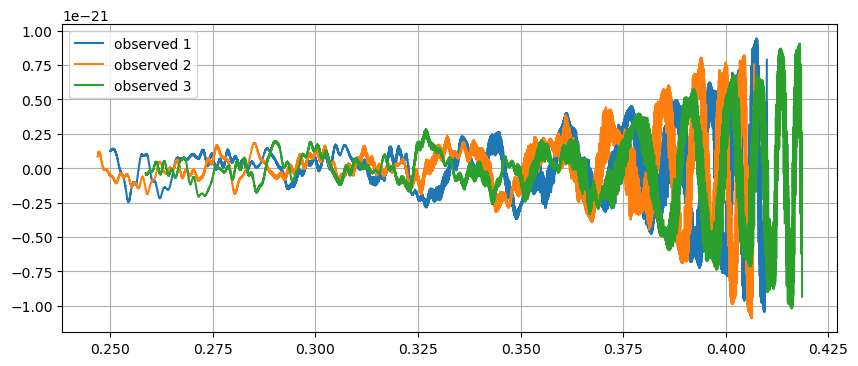

In [3]:
plt.figure(figsize=(10, 4))
plt.plot(time1, strain1, label = 'observed 1')
plt.plot(time2, strain2, label = 'observed 2')
plt.plot(time3, strain3, label = 'observed 3')
plt.legend()
plt.grid()
plt.show()

In [4]:
time_shift1 = np.average(time1 - time2)
time_shift2 = np.average(time1 - time3)

print(time_shift1, time_shift2)
time2 = time2 + time_shift1
time3 = time3 + time_shift2
strain3 = -strain3 # inversion 

0.003099999999999992 -0.008599999999999997


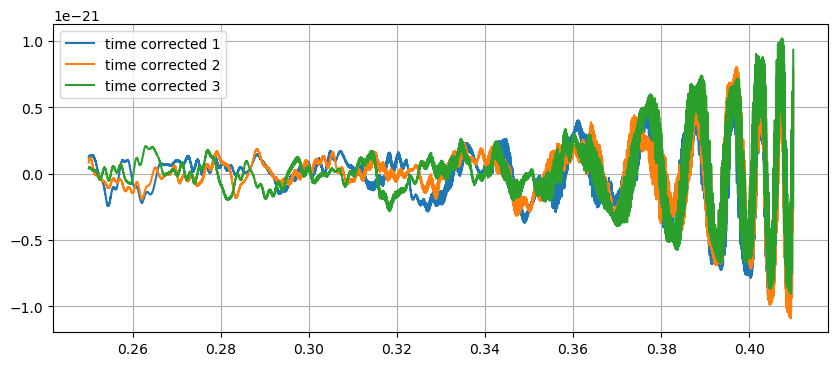

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(time1, strain1, label = 'time corrected 1')
plt.plot(time2, strain2, label = 'time corrected 2')
plt.plot(time3, strain3, label = 'time corrected 3')
plt.legend()
plt.grid()
plt.show()

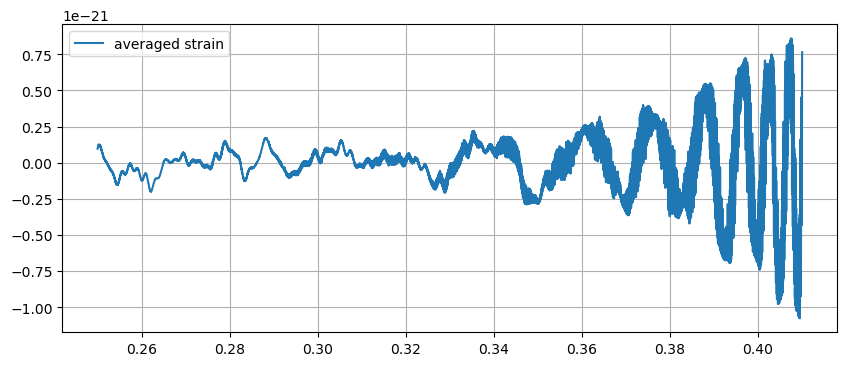

In [6]:
strain_average = (strain1 + strain2 + strain2) / 3

plt.figure(figsize=(10, 4))
plt.plot(time1, strain_average, label='averaged strain')
plt.legend()
plt.grid()
plt.show()

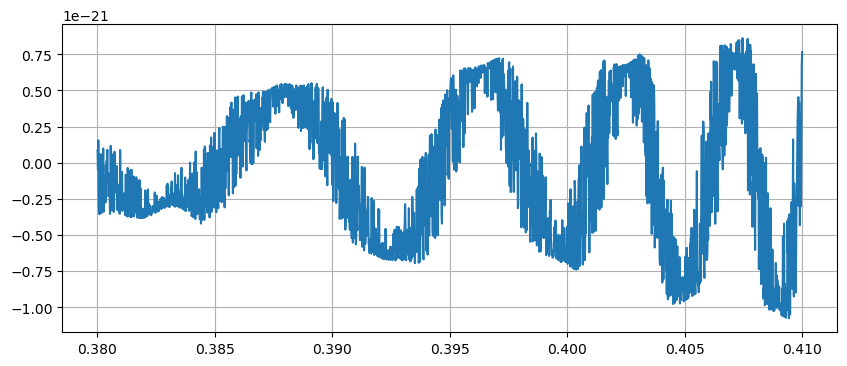

In [7]:
usable_time = time1[time1>0.38]
usable_strain = strain_average[time1>0.38]

plt.figure(figsize=(10, 4))
plt.plot(usable_time, usable_strain)
plt.grid()
plt.show()

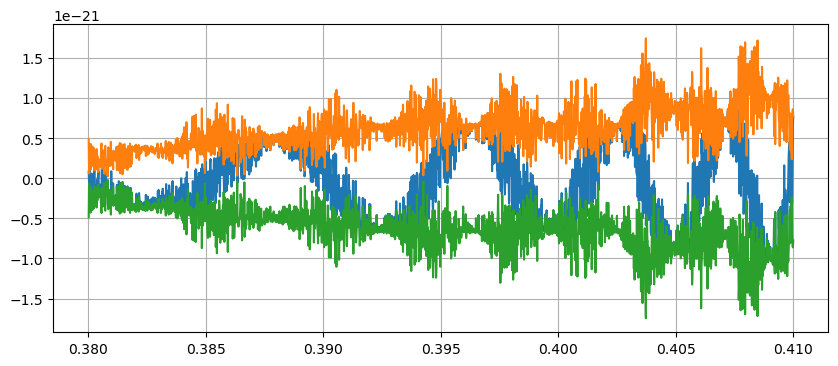

In [8]:
signal = hilbert(usable_strain)
envelope = np.abs(signal)

plt.figure(figsize=(10, 4))
plt.plot(usable_time, usable_strain)
plt.plot(usable_time, envelope)
plt.plot(usable_time, -envelope)
plt.grid()
plt.show()

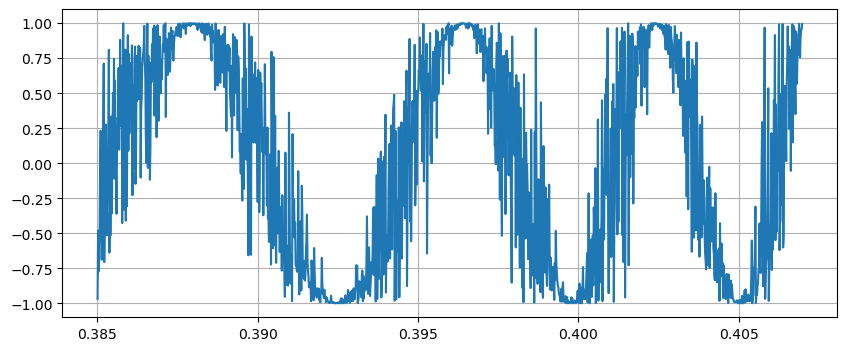

In [9]:
fit_indices_lower = np.where(usable_time > 0.385)
fit_indices_upper = np.where(usable_time < 0.407)
lower_index = fit_indices_lower[0][0]
upper_index = fit_indices_upper[0][-1]


fit_time = usable_time[lower_index:upper_index]
fit_strain = usable_strain[lower_index:upper_index]
fit_envelope = envelope[lower_index:upper_index]

sin_func = fit_strain / fit_envelope
plt.figure(figsize=(10, 4))
plt.plot(fit_time, sin_func)
plt.grid()
plt.show()

In [10]:
G = 6.67430 * (10 ** (-11))
M = 1.9891 * (10 ** (30))
C = 299_792_458
t0 = 0.42
f0 = 128

In [11]:
def calcChirpMass(m1, m2):
    num = (np.abs(m1*m2)) ** (3/5)
    denom = (np.abs(m1+m2)) ** (1/5)
    return ((num/denom) * M)

def calcK(chirpMass):
    k1 = G*chirpMass / (C ** 3)
    k2 = (np.pi ** (8/3))
    return ((96/5) * (k1**(5/3)) * k2)

def calcC(k):
    k1 = (-3/8) * (f0 ** (-8/3))
    return (k1 - k*t0)

def calcFreq(t, m1, m2):
    chirpMass = calcChirpMass(m1, m2)
    k = calcK(chirpMass)
    c = calcC(k)
    k1 = (-3/8) * (k*t + c)
    return (np.abs(k1) ** (-3/8))

def curveFitFunc(t, m1, m2):
    freq = calcFreq(t, m1, m2)
    return np.sin(freq*t)

In [12]:
popt, pcov = curve_fit(curveFitFunc, fit_time, sin_func, bounds=([0,0],[80,60]))
m1 , m2 = popt

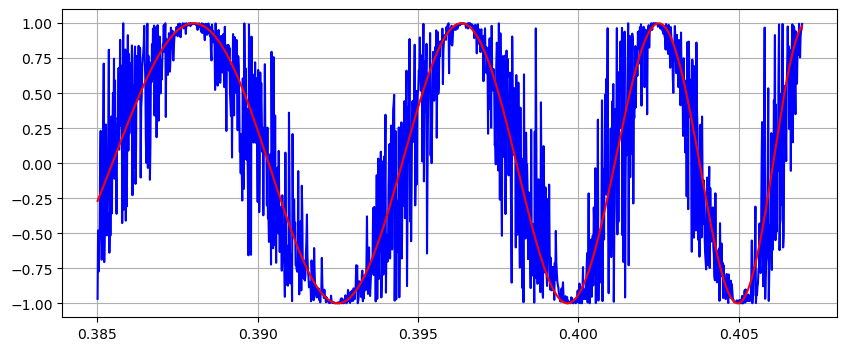

In [13]:
calc_freq = calcFreq(fit_time, m1, m2)
sin_part = np.sin(calc_freq * fit_time)

plt.figure(figsize=(10, 4))
plt.plot(fit_time, sin_func, 'b')
plt.plot(fit_time, sin_part, 'r')
plt.grid()
plt.show()

In [14]:
print(f'm1 = {m1.round(2)} solar masses')
print(f'm2 = {m2.round(2)} solar masses')

m1 = 37.33 solar masses
m2 = 28.0 solar masses
